In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fk4932a_ because the default path (/afs/ihep.ac.cn/users/l/luoxj/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


 13%|█▎        | 668/5000 [00:07<00:46, 93.55it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:372: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
100%|██████████| 5000/5000 [00:53<00:00, 93.64it/s] 


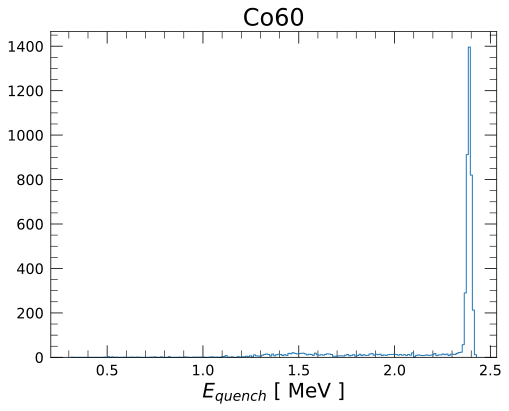

In [2]:
from importlib import reload
import PlotTrackOfProcess
reload(PlotTrackOfProcess)
from PlotTrackOfProcess import PlotTrackOfProcess
track_tool = PlotTrackOfProcess()

import tqdm

v_particles = [ "Co60"]
# v_particles = ["alpha", "gamma", "neutron"]
v_particles_subdir = [ ""]
# v_name_files = ["user-detsim-100.root"]*2+["user-detsim-103.root"]
v_name_files = ["user-detsim-100.root"]
# v_particles = [ "neutron"]
# v_particles_subdir = [""]
# v_name_files = ["user-detsim-103.root"]
template_path = \
    "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Sim_DSNB/timing_constant_study/" \
    "{}/0_0_0/{}/detsim/user-root/{}"
check_result_with_track = False

# template_path = \
# "/afs/ihep.ac.cn/users/l/luoxj/DSNB_component_fitting/timing_constant_study/{}/{}"
dir_v_dE_dx_average = {}
dir_v_dE_dx_average_with_quench = {}
dir_v_equen = {}
for i,particle in enumerate(v_particles):
    name_file_full_path = template_path.format(particle, v_particles_subdir[i],
                            v_name_files[i])
    # name_file_full_path = template_path.format(particle, v_name_files[i])
    track_tool.SetDataset(name_file_full_path)
    index_evtID_of_equen = track_tool.GetEvtIDOfDepTree()
    entries = track_tool.GetTotalEntries()
    v_dE_dx = []
    v_dE_dx_with_quench = []
    v_equen = track_tool.PlotEquen(title=particle,
                                   name_fig_save=f"./figure/Equen_{particle}.png",filter_n_capture=(particle=="neutron" or particle=="AmC"), bins=200)
    # for j_entry in tqdm.trange(entries)[:1000]:
    n_figure_track = 0
    for j_entry in tqdm.trange(entries):
        # track_tool.PlotTrackWithEntrySource(j_entry,print_track_info=True)
        # v_dE_dx_one_event, v_dE_one_event = track_tool.Get_dE_dx_ByLoading(entry_source=j_entry)
        # print(particle,v_dE_one_event)
        # track_tool.PlotDiffParticle_dE_dx(j_entry,print_info=True)

        # if particle=="neutron":

        dE_dx_average = track_tool.Get_Average_dE_dx(j_entry)
        dE_dx_average_with_quench = track_tool.Get_Average_dE_dx(j_entry,times_quench_factor=True)
        v_dE_dx.append(dE_dx_average)
        v_dE_dx_with_quench.append(dE_dx_average_with_quench)

        if n_figure_track>10 and check_result_with_track:
            break
    dir_v_dE_dx_average[particle] = np.array(v_dE_dx)[index_evtID_of_equen]
    dir_v_equen[particle] = v_equen
    dir_v_dE_dx_average_with_quench[particle] = np.array(v_dE_dx_with_quench)[index_evtID_of_equen]

In [102]:
dir_track = track_tool.dir_tracks
# for evtID in range(10):
from GetPhysicsProperty import PDGMassMap
map_pdg = PDGMassMap()
map_pdg.GetBaseMass()
only_parent_ID =1
v2d_p_divide_mass = []

evtID_depTree = track_tool.GetEvtIDOfDepTree()
v_equen_depTree = track_tool.Get_v_Equen()
v_equen_plot = []
v2d_dE_quench_step = []
v2d_dE_dx = []
for evtID in range(500):
# for evtID in [0]:
    index_evtID = (dir_track["evtID"]==evtID)
    v_parentID = dir_track["MuParentID"][index_evtID]
    index_parentID = (v_parentID==only_parent_ID)

    # v_process_name = dir_track["MuCreateProcess"][index_evtID][index_parentID]
    # print(v_process_name)
    v_equen_plot.append(v_equen_depTree[evtID_depTree==evtID][0])
    v_p_divide_mass = []
    v_dE_dx = []
    v_dE_equen = []
    for i_track in range(len(dir_track["Mu_Px"][index_evtID][index_parentID])):
        momentum = (dir_track["Mu_Px"][index_evtID][index_parentID][i_track][0]**2+
              dir_track["Mu_Py"][index_evtID][index_parentID][i_track][0]**2+
              dir_track["Mu_Pz"][index_evtID][index_parentID][i_track][0]**2)**0.5
        mass = map_pdg.PDGToMass(dir_track["pdgID"][index_evtID][index_parentID][i_track])

        v_p_divide_mass.append( momentum/mass)
        v_dE_dx.append(dir_track["Mu_dE"][index_evtID][index_parentID][i_track][0]/dir_track["Mu_dx"][index_evtID][index_parentID][i_track][0])
        v_dE_equen.append(dir_track["Mu_dE_quench"][index_evtID][index_parentID][i_track][0])
    v2d_dE_dx.append(np.array(v_dE_dx))
    v2d_p_divide_mass.append(np.array(v_p_divide_mass))
    v2d_dE_quench_step.append(np.array(v_dE_equen))
v2d_p_divide_mass = np.array(v2d_p_divide_mass)
v2d_dE_dx = np.array(v2d_dE_dx)
v2d_dE_quench_step = np.array(v2d_dE_quench_step)
print(v2d_p_divide_mass.shape)
print(v2d_dE_dx.shape)
print(v_equen_plot)

(500,)
(500,)
[1.5472027673670667, 2.3855541693398052, 2.374334453825167, 1.2984333723389163, 2.3401921360865585, 2.381202520868787, 2.374920069371606, 2.375367887526915, 2.4056130408440506, 2.396679558134114, 2.3687601345246647, 2.3696330753590495, 2.3999493822934768, 1.9233100021292064, 2.4085238001036515, 2.3862042349152457, 2.36489938940792, 1.5909978837202716, 2.39254496743938, 2.4050361906122317, 2.403323396127697, 2.374602901189646, 0.5927917389284894, 2.3964032658940284, 2.389087434355319, 2.3963222673925335, 2.293070736716975, 2.4033947704799172, 2.3911618673469066, 2.4152437783445295, 1.6640135055528953, 2.0180665900072867, 2.391837917702119, 2.4077496491913215, 2.384741714190665, 2.378185570470695, 1.6050915521157, 2.3543113030328175, 2.373805927330231, 1.535034116625119, 1.9594567454393759, 2.368009439719082, 1.1878518041787445, 2.4109160385837667, 1.876581171511035, 2.399733251535798, 2.398060099723308, 2.3838300130977617, 2.3123702200371548, 2.399312309497856, 2.200129818

<ipython-input-102-185c08134a16>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v2d_p_divide_mass = np.array(v2d_p_divide_mass)
<ipython-input-102-185c08134a16>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v2d_dE_dx = np.array(v2d_dE_dx)
<ipython-input-102-185c08134a16>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v2d_dE_q

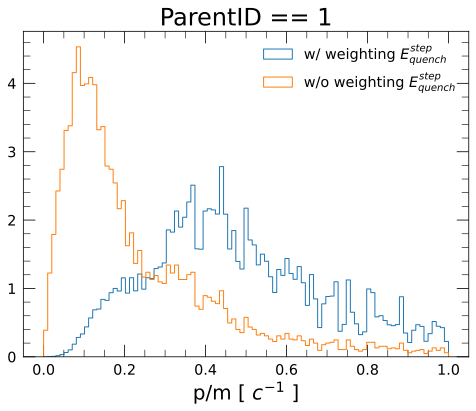

In [111]:
plt.figure()
v2d_equen_weight_for_hist = []
for i in range(len(v2d_p_divide_mass)):
    v2d_equen_weight_for_hist.append(np.ones(len(v2d_p_divide_mass[i]))*v_equen_plot[i])
# print(v2d_equen_weight_for_hist)
plt.hist(np.concatenate(v2d_p_divide_mass),density=True, bins=np.linspace(0,1,100),histtype="step",
         weights=np.concatenate(v2d_dE_quench_step),label="w/ weighting $E_{quench}^{step}$")
plt.hist(np.concatenate(v2d_p_divide_mass), density=True,bins=np.linspace(0,1,100),histtype="step",
         label="w/o weighting $E_{quench}^{step}$")

plt.legend()
plt.title(f"ParentID == {only_parent_ID}")
plt.xlabel("p/m [ $c^{-1}$ ]")
plt.savefig(f"./figure/p_divide_mass_{particle}_parentID_equal_1.png")

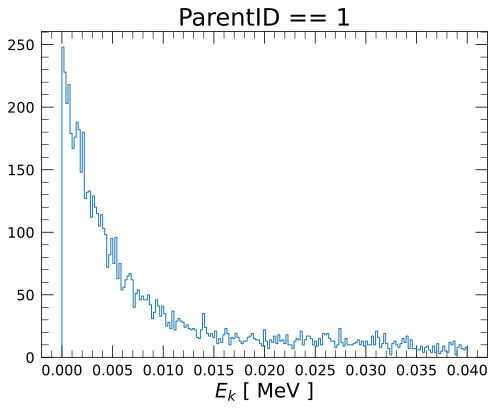

In [127]:
v2d_Ek = ( (v2d_p_divide_mass*0.511)**2+0.511**2 )**0.5-0.511
plt.hist(np.concatenate(v2d_Ek), bins=np.linspace(0,0.04, 200), histtype="step")
plt.title(f"ParentID == {only_parent_ID}")
plt.xlabel("$E_k$ [ MeV ]")
plt.savefig(f"./figure/Ek_parentID_equal_1_{particle}.png")

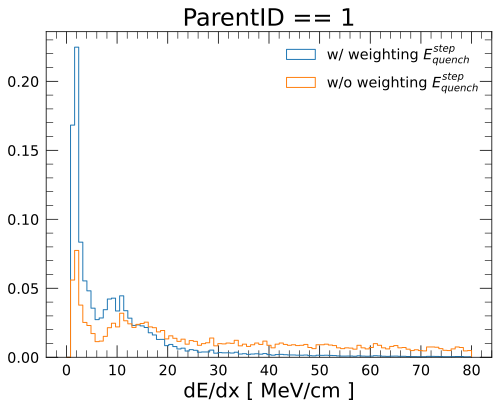

In [113]:
# print(v2d_dE_dx)
plt.figure()
plt.hist(np.concatenate(v2d_dE_dx*10), bins=np.linspace(0,80,100),density=True,histtype="step",label="w/ weighting $E_{quench}^{step}$",
         weights=np.concatenate(v2d_dE_quench_step))
plt.hist(np.concatenate(v2d_dE_dx*10), bins=np.linspace(0,80,100),density=True,histtype="step",label="w/o weighting $E_{quench}^{step}$")
plt.title(f"ParentID == {only_parent_ID}")
plt.xlabel("dE/dx [ MeV/cm ]")
plt.legend()
plt.savefig(f"./figure/dE_dx_{particle}_parentID_equal_1.png")

# for i in range(len(v2d_p_divide_mass)):
# for i in range(10):
#     plt.hist(v2d_p_divide_mass[i], histtype="step", bins=np.linspace(0,2.5, 20),label=f"Equen = {v_equen_plot[i]:.1f} MeV")
# plt.title(f"ParentID == {only_parent_ID}")
# plt.xlabel("p/m [ $c^{-1}$ ]")
# plt.legend()


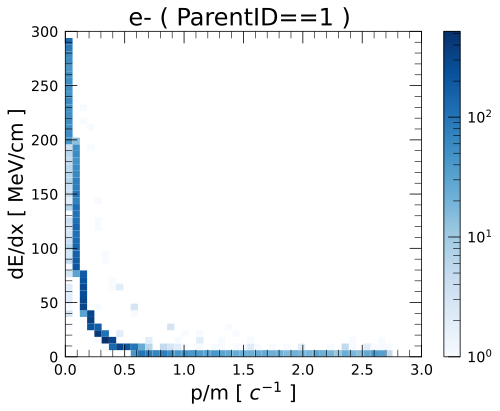

In [126]:
from matplotlib.colors import LogNorm
plt.hist2d(np.concatenate(v2d_p_divide_mass),np.concatenate(v2d_dE_dx*10),cmap="Blues",
           bins=(np.linspace(0,3,50),np.linspace(0,300,50)),norm=LogNorm())
plt.xlabel("p/m [ $c^{-1}$ ]")
plt.ylabel("dE/dx [ MeV/cm ]")
plt.colorbar()
plt.title("e- ( ParentID==1 ) ")
plt.savefig(f"./figure/hist2d_p_divide_mass_and_dE_dx_{particle}.png")